# Airbnb ROI Predictor Model

## Introduction

<p>This aim is to build a model consisting of 2 sub-models.</p>
<p>Upon feeding the model the property features, one will predict the profit of renting the property on Airbnb (The model will predict the yield per day and assume the number of days it will be rented out).</p>
<p>The second model will estimate the price of the property depending on its features.</p>
<p>The result will be based on the results of the 2 sub-models to calculate the ROI for the provided property.</p>

## Exploring The Dataset

In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the airbnb dataset
df = pd.read_csv('datasets/airbnb-cleaned-europe-dataset.csv')
df.head()

,City,Price,Day,Room Type,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
0,Amsterdam,194.033698,Weekday,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473
1,Amsterdam,344.245776,Weekday,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928
2,Amsterdam,264.101422,Weekday,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700
3,Amsterdam,433.529398,Weekday,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565
4,Amsterdam,485.552926,Weekday,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677


In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41714 entries, 0 to 41713
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   City                         41714 non-null  object 
 1   Price                        41714 non-null  float64
 2   Day                          41714 non-null  object 
 3   Room Type                    41714 non-null  object 
 4   Shared Room                  41714 non-null  bool   
 5   Private Room                 41714 non-null  bool   
 6   Person Capacity              41714 non-null  float64
 7   Superhost                    41714 non-null  bool   
 8   Multiple Rooms               41714 non-null  int64  
 9   Business                     41714 non-null  int64  
 10  Cleanliness Rating           41714 non-null  float64
 11  Guest Satisfaction           41714 non-null  float64
 12  Bedrooms                     41714 non-null  int64  
 13  City Center (km)

In [216]:
df['Day'].value_counts()

Weekday    20886
Weekend    20828
Name: Day, dtype: int64

In [217]:
df['Room Type'].value_counts()

Entire home/apt    28264
Private room       13134
Shared room          316
Name: Room Type, dtype: int64

## Data Preparation

<p>Here we see that the columns Day and Room Type are categorical data, and we'll convert them to numric data by using One-Hot Encoding (Dummy Variables)</p>

In [218]:
pd.get_dummies(df['Day'])

,Weekday,Weekend
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
41709,0,1
41710,0,1
41711,0,1
41712,0,1


In [219]:
# Join with data set
df = df.join(pd.get_dummies(df['Day']))

In [220]:
pd.get_dummies(df['Room Type'])

,Entire home/apt,Private room,Shared room
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
41709,1,0,0
41710,1,0,0
41711,1,0,0
41712,0,1,0


In [221]:
temp = df[df['Room Type'] == 'Private room']
temp['Private Room'].value_counts()

True    13134
Name: Private Room, dtype: int64

In [222]:
temp = df[df['Room Type'] == 'Shared room']
temp['Shared Room'].value_counts()

True    316
Name: Shared Room, dtype: int64

<p>Here we can see that all the private room type has value true in the Private Room column, so we can drop the Private Room column before doing the join.</p>
<p>The same goes for the Shared Room column.</p>

In [223]:
df.drop('Private Room', axis=1, inplace=True)
df.drop('Shared Room', axis=1, inplace=True)

In [224]:
# Join with data set
df = df.join(pd.get_dummies(df['Room Type']))

In [225]:
df.drop('Room Type', axis=1, inplace=True)
df.drop('Day', axis=1, inplace=True)
df.head()

,City,Price,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index,Weekday,Weekend,Entire home/apt,Private room,Shared room
0,Amsterdam,194.033698,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,1,0,0,1,0
1,Amsterdam,344.245776,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,1,0,0,1,0
2,Amsterdam,264.101422,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,1,0,0,1,0
3,Amsterdam,433.529398,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,1,0,0,1,0
4,Amsterdam,485.552926,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,1,0,0,1,0


Now we're going to convert the superhost column to numeric values, to 1 and 0 instead of True and False

In [227]:
df['Superhost'] = df['Superhost'].astype(int)
df.head()

,City,Price,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index,Weekday,Weekend,Entire home/apt,Private room,Shared room
0,Amsterdam,194.033698,2.0,0,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,1,0,0,1,0
1,Amsterdam,344.245776,4.0,0,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,1,0,0,1,0
2,Amsterdam,264.101422,2.0,0,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,1,0,0,1,0
3,Amsterdam,433.529398,4.0,0,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,1,0,0,1,0
4,Amsterdam,485.552926,2.0,1,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,1,0,0,1,0


Now we have all the columns as numeric values except the city column

# continue from here <==============================

array([[<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Person Capacity'}>,
        <Axes: title={'center': 'Multiple Rooms'}>,
        <Axes: title={'center': 'Business'}>],
       [<Axes: title={'center': 'Cleanliness Rating'}>,
        <Axes: title={'center': 'Guest Satisfaction'}>,
        <Axes: title={'center': 'Bedrooms'}>,
        <Axes: title={'center': 'City Center (km)'}>],
       [<Axes: title={'center': 'Metro Distance (km)'}>,
        <Axes: title={'center': 'Attraction Index'}>,
        <Axes: title={'center': 'Normalised Attraction Index'}>,
        <Axes: title={'center': 'Restraunt Index'}>],
       [<Axes: title={'center': 'Normalised Restraunt Index'}>,
        <Axes: title={'center': 'Weekday'}>,
        <Axes: title={'center': 'Weekend'}>, <Axes: >]], dtype=object)

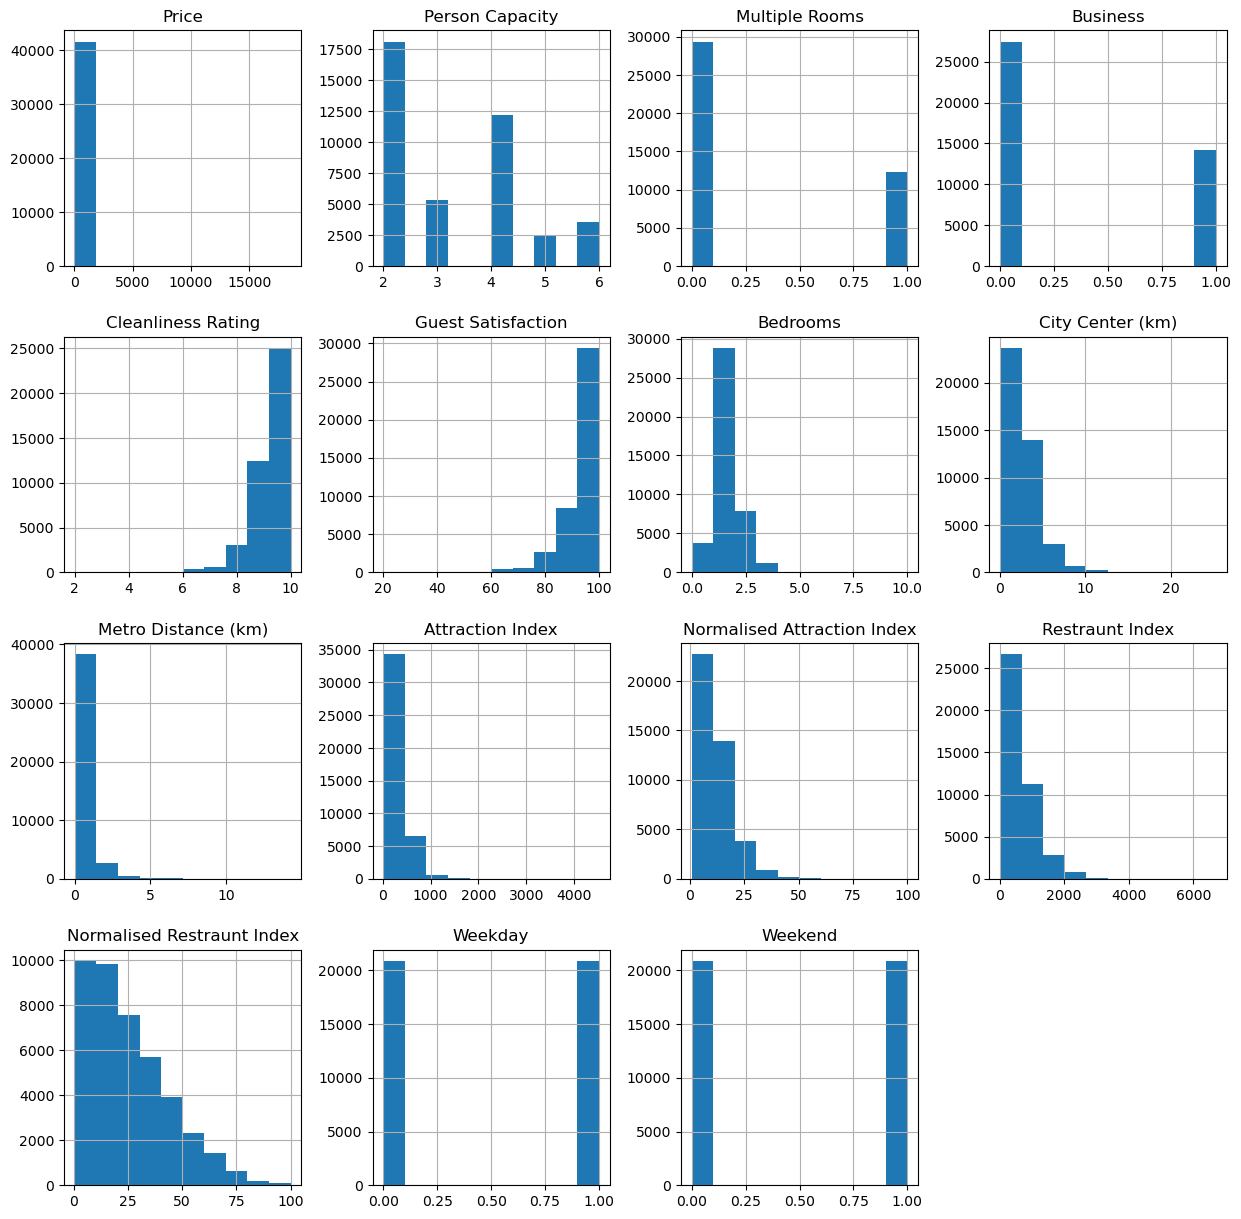

In [175]:
df.hist(figsize=(15,15))

In [ ]:
df.corr(numeric_only=True)

In [ ]:
sns.set(rc = {'figure.figsize':(15, 15)})
sns.heatmap(df.corr(numeric_only=True), cmap='YlGnBu', annot=True)